In [47]:

import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.style as stl
stl.use('dark_background')

In [48]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [49]:
pd.options.mode.chained_assignment = None

In [64]:
year = 2022
circuit = 'Australia'

# Load the session data
race = ff1.get_session(year, circuit, 'R')
laps = race.load_laps(with_telemetry=True)

/usr/local/lib/python3.9/site-packages/fastf1/core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']


In [51]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [52]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [53]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

In [66]:
race.results.Abbreviation

16    LEC
11    PER
63    RUS
44    HAM
4     NOR
3     RIC
31    OCO
77    BOT
10    GAS
23    ALB
24    ZHO
18    STR
47    MSC
20    MAG
22    TSU
6     LAT
14    ALO
1     VER
5     VET
55    SAI
Name: Abbreviation, dtype: object

In [65]:
# race = race.results
for driver in race.results.Abbreviation:
    print(driver)

DriverNumber
BroadcastName
Abbreviation
TeamName
TeamColor
FirstName
LastName
FullName
Position
GridPosition
Q1
Q2
Q3
Time
Status
Points


   Driver  Stint Compound  StintLength
14    LEC      1   MEDIUM           22
15    LEC      2     HARD           36
   Driver  Stint Compound  StintLength
24    PER      1   MEDIUM           20
25    PER      2     HARD           38
   Driver  Stint Compound  StintLength
28    RUS      1   MEDIUM           23
29    RUS      2     HARD           35
   Driver  Stint Compound  StintLength
9     HAM      1   MEDIUM           22
10    HAM      2     HARD           36
   Driver  Stint Compound  StintLength
20    NOR      1   MEDIUM           20
21    NOR      2     HARD           38
   Driver  Stint Compound  StintLength
26    RIC      1   MEDIUM           21
27    RIC      2     HARD           37
   Driver  Stint Compound  StintLength
22    OCO      1   MEDIUM           17
23    OCO      2     HARD           41
  Driver  Stint Compound  StintLength
5    BOT      1   MEDIUM           22
6    BOT      2     HARD           36
  Driver  Stint Compound  StintLength
7    GAS      1   MEDIUM     

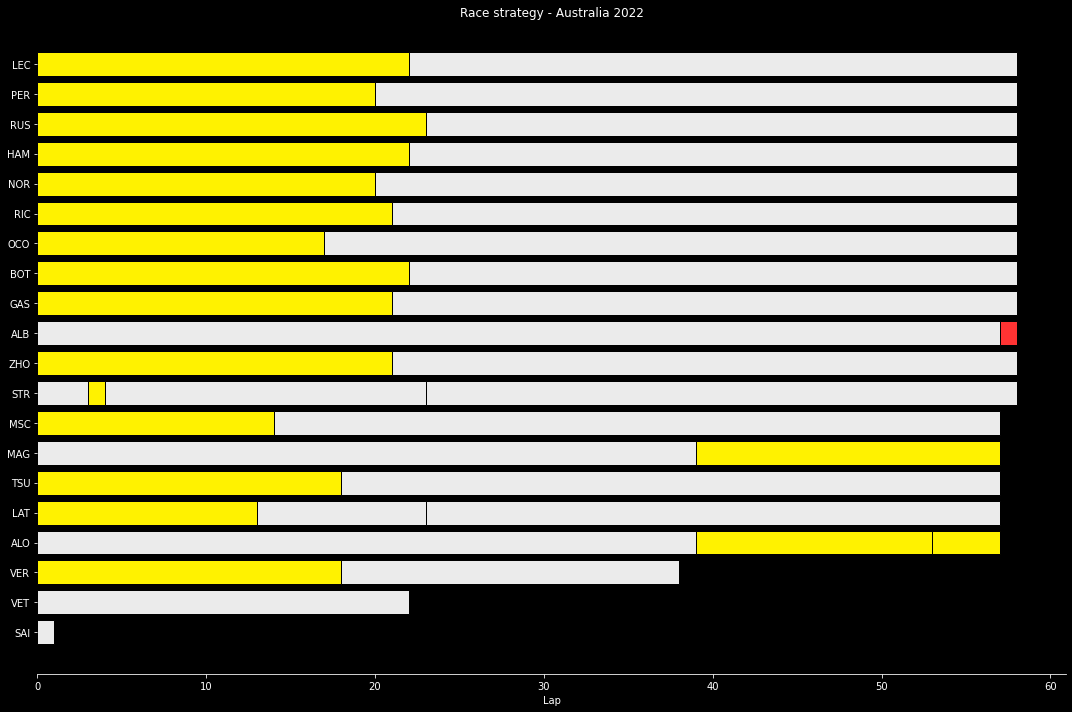

In [69]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in race.results.Abbreviation:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    print(stints)
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
# Set title
plt.title(f'Tire strategy - {circuit} {year}')
        
# Set x-label
plt.xlabel('Lap')

# Invert y-axis 
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('strategy_russia.png', dpi=300)

plt.show()